## Import pandas and matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Read csv from NYC Open Data 
(Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data)

All 311 Service Requests for Dirty Conditions and Descriptor «Trash» in 2023

In [5]:
df = pd.read_csv('./data/dirty-condition_2023.csv', low_memory=False)
# show all rows
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Police Precinct
0,59887701,12/31/2023 11:07:04 PM,01/02/2024 01:31:45 PM,DSNY,Department of Sanitation,Dirty Condition,Trash,Street,11214.0,2023 86 STREET,...,NaN,40.604264,-73.997659,"(40.604263837073454, -73.99765916765476)",17616.0,1.0,2.0,45.0,37.0,37.0
1,59892125,12/31/2023 11:01:16 PM,01/02/2024 10:12:35 AM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,10016.0,245 EAST 40 STREET,...,NaN,40.748754,-73.973632,"(40.74875396176763, -73.97363197826526)",12079.0,71.0,4.0,51.0,9.0,9.0
2,59889425,12/31/2023 09:44:08 PM,01/02/2024 01:24:21 PM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,11237.0,1325 WILLOUGHBY AVENUE,...,NaN,40.705961,-73.921127,"(40.705961164750924, -73.92112704424554)",13828.0,42.0,2.0,30.0,53.0,53.0
3,59889427,12/31/2023 09:43:21 PM,01/02/2024 01:21:59 PM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,11237.0,1329 WILLOUGHBY AVENUE,...,NaN,40.706024,-73.921062,"(40.706024249798475, -73.92106204757528)",13828.0,42.0,2.0,30.0,53.0,53.0
4,59892126,12/31/2023 09:02:57 PM,01/02/2024 10:10:25 AM,DSNY,Department of Sanitation,Dirty Condition,Trash,Sidewalk,10016.0,527 THIRD AVENUE,...,NaN,40.746534,-73.977520,"(40.74653428445987, -73.97751971881615)",12078.0,71.0,4.0,51.0,9.0,9.0


### Check type of the Columns

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49657 entries, 0 to 49656
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      49657 non-null  int64  
 1   Created Date                    49657 non-null  object 
 2   Closed Date                     49318 non-null  object 
 3   Agency                          49657 non-null  object 
 4   Agency Name                     49657 non-null  object 
 5   Complaint Type                  49657 non-null  object 
 6   Descriptor                      49657 non-null  object 
 7   Location Type                   49657 non-null  object 
 8   Incident Zip                    49514 non-null  float64
 9   Incident Address                49514 non-null  object 
 10  Street Name                     49514 non-null  object 
 11  Cross Street 1                  49443 non-null  object 
 12  Cross Street 2                  

### Check for missing data

In [36]:
# Check for missing values
df.isnull().sum()

Unique Key                            0
Created Date                          0
Closed Date                         339
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                            0
Location Type                         0
Incident Zip                        143
Incident Address                    143
Street Name                         143
Cross Street 1                      214
Cross Street 2                      181
Intersection Street 1               214
Intersection Street 2               181
Address Type                        146
City                               3129
Landmark                           3133
Facility Type                     49657
Status                                0
Due Date                          49657
Resolution Description              313
Resolution Action Updated Date      195
Community Board                       0
BBL                                5880


## Analyse Dataset

### Sigthings by Borough

In [37]:
# Remove Unspecified boroughs and save to existing data
df = df[df['Borough'] != 'Unspecified']

# Group by Descriptor
df['Descriptor'].value_counts()

# Remove where Descriptor is not Trash
df = df[df['Descriptor'] == 'Trash']

df['Descriptor'].value_counts()



Descriptor
Trash    43996
Name: count, dtype: int64

In [38]:
# Dirty Condition by borough
df_borough = df['Borough'].value_counts()

<Axes: title={'center': 'Dirty Condition by Borough'}, ylabel='Borough'>

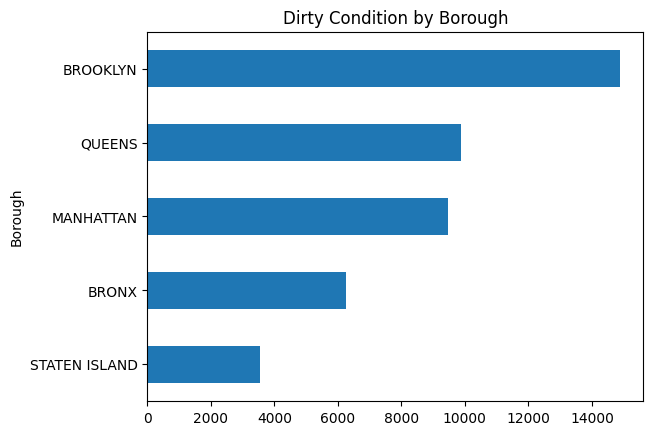

In [39]:
# plot Dirty Condition by borough horizontal bar chart sorted by count
df['Borough'].value_counts().sort_values().plot(kind='barh', title='Dirty Condition by Borough')


Just for 2022 because we have population data from 2023

In [40]:

# Convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])

# df['Borough'].value_counts() just for year 2023
df_2023 = df[df['Created Date'].dt.year == 2023]

df_2023_by_borough = df_2023['Borough'].value_counts()

/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_75426/670617496.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'])


<Axes: title={'center': 'Dirty Condition by Borough in 2023'}, ylabel='Borough'>

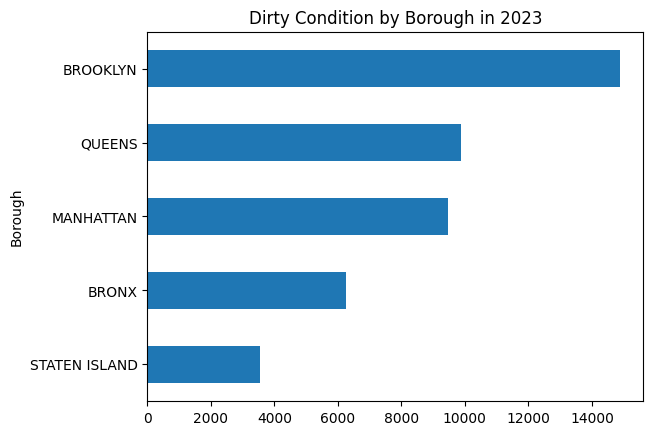

In [41]:
df_2023['Borough'].value_counts().sort_values().plot(kind='barh', title='Dirty Condition by Borough in 2023')


In [42]:
# export df_2023_by_borough to csv
df_2023_by_borough.to_csv('./data/dirty_condition_2023_by_borough.csv')

### Dirty Condition by Zip Code for all years

In [43]:
# Dirty Condition by zip code
df['Incident Zip'].value_counts()

Incident Zip
10468.0    1030
10312.0     943
11220.0     926
10309.0     727
11207.0     692
           ... 
10169.0       1
11695.0       1
10041.0       1
11697.0       1
11241.0       1
Name: count, Length: 189, dtype: int64

### Plotting a time series of dirty conditions by date

<Axes: title={'center': 'Dirty Condition by Date'}, xlabel='Created Date'>

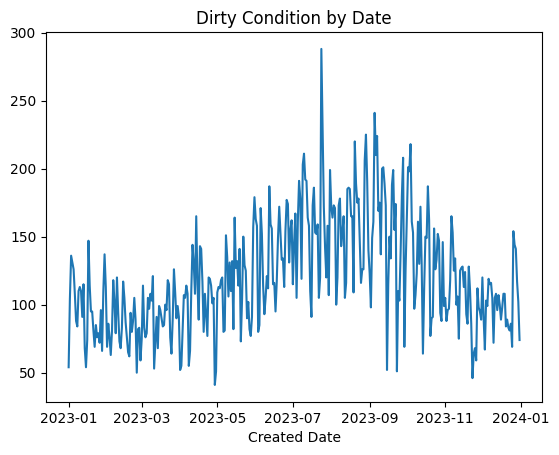

In [44]:
# line plot of Dirty Condition by date
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Created Date'].dt.date.value_counts().sort_index().plot(title='Dirty Condition by Date')

Timeserie by Borough

<Axes: title={'center': 'Dirty Condition by Borough and Month'}, xlabel='Created Date'>

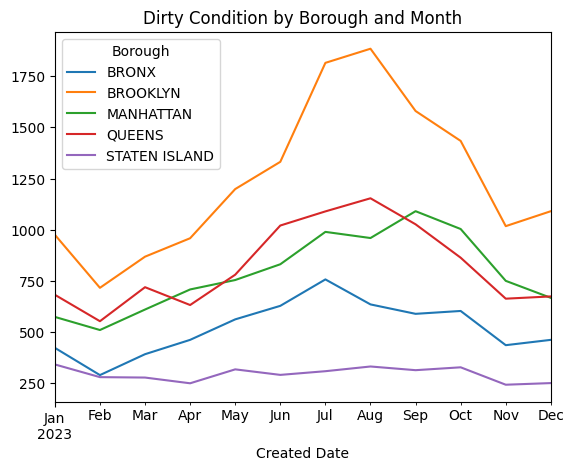

In [45]:
# line plot of Dirty Condition by date

# Convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Group by 'Borough' and 'Created Date', then count sightings for each date within each borough
# Unstack the 'Borough' to get borough-wise columns
# Resample by month ('M') and sum the counts to get total sightings per month for each borough
# Plot the data
df.groupby('Borough')['Created Date'].value_counts().unstack(0).resample('ME').sum().plot(title='Dirty Condition by Borough and Month')


### Dates with the most Dirty Condition

In [46]:
# 10 days with the most Dirty Condition
df['Created Date'].dt.date.value_counts().nlargest(10)

Created Date
2023-07-24    288
2023-09-05    241
2023-07-25    228
2023-08-29    225
2023-09-07    224
2023-08-20    220
2023-10-04    218
2023-07-10    211
2023-09-06    210
2023-09-28    208
Name: count, dtype: int64

In [47]:
# date of the most Dirty Condition
df['Created Date'].dt.date.value_counts().idxmax()

datetime.date(2023, 7, 24)

dates with the most Dirty Condition for manhattan

In [48]:
# three dates of the most Dirty Condition in manhattan
df[df['Borough'] == 'MANHATTAN']['Created Date'].dt.date.value_counts().nlargest(3)

Created Date
2023-09-05    64
2023-04-14    58
2023-09-13    56
Name: count, dtype: int64

### Dirty Condition by year

In [49]:
# Dirty Condition by year and sort by year
df['Created Date'].dt.year.value_counts().sort_index(ascending=False)


Created Date
2023    43996
Name: count, dtype: int64

<Axes: title={'center': 'Dirty Condition by Year'}, xlabel='Created Date'>

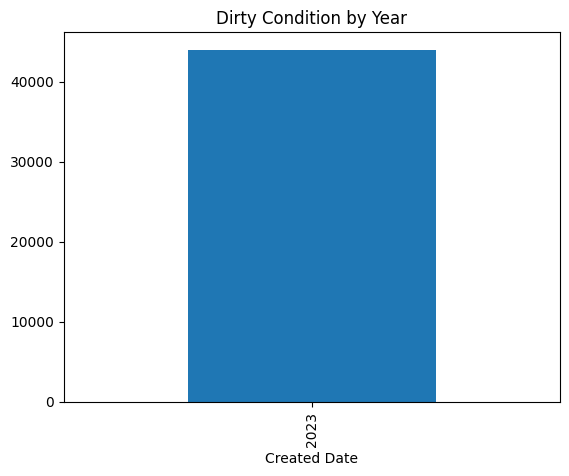

In [50]:
# plot Dirty Condition by year
df['Created Date'].dt.year.value_counts().sort_index(ascending=True).plot(kind='bar', title='Dirty Condition by Year')

## Dirty Condition by weekday

Created Date
Friday       6089
Monday       7194
Saturday     4751
Sunday       5228
Thursday     6580
Tuesday      7249
Wednesday    6905
Name: count, dtype: int64

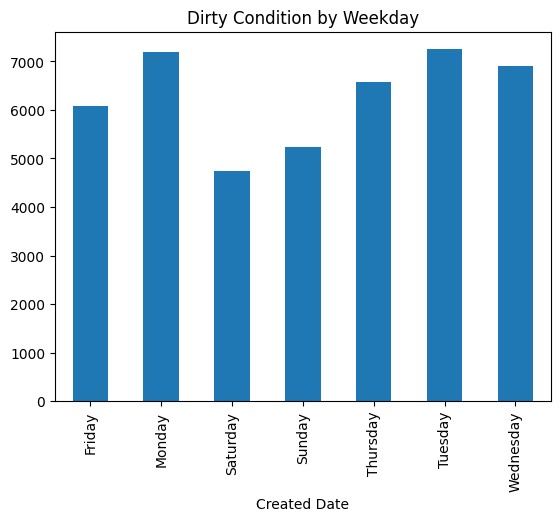

In [51]:
# Dirty Condition by weekday
df['Created Date'].dt.day_name().value_counts()

# plot Dirty Condition by weekday
# df['Created Date'].dt.day_name().value_counts().plot(kind='bar')

# sum of Dirty Condition by weekday and plot
df['Created Date'].dt.day_name().value_counts().sort_index().plot(kind='bar', title='Dirty Condition by Weekday')

# sum of Dirty Condition by weekday and total count for all weekdays
df['Created Date'].dt.day_name().value_counts().sort_index()



### Dirty Condition by months

In [52]:
# irst create a DataFrame that counts the occurrences of each 'month_year' combination,
# then pivot this DataFrame to have months as columns and years as rows.

# Step 1: Convert 'Created Date' to datetime if not already done
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Step 2: Extract month and year into a new column
df['month_year'] = df['Created Date'].dt.to_period('M')

# Step 3: Count occurrences of each 'month_year'
month_year_counts = df['month_year'].value_counts().sort_index()

# Step 4: Convert the Series to a DataFrame
month_year_df = month_year_counts.reset_index()
month_year_df.columns = ['month_year', 'count']

# Step 5: Extract year and month from 'month_year' to separate columns
month_year_df['year'] = month_year_df['month_year'].dt.year
month_year_df['month'] = month_year_df['month_year'].dt.month

# Step 6: Pivot the DataFrame to have years as rows and months as columns
pivot_df = month_year_df.pivot(index='year', columns='month', values='count')

pivot_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2023,3001,2354,2872,3015,3617,4106,4963,4967,4603,4235,3114,3149


### Dirt Condition by Zip Code then merge it with unique City and Borough for each Incident Zip to get a list for export

In [53]:
# Convert 'Incident Zip' to numeric, coercing errors to NaN, then fill NaNs with 0
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'], errors='coerce').fillna(0).astype(int)

df['Incident Zip'].value_counts().sort_values(ascending=False)

Incident Zip
10468    1030
10312     943
11220     926
10309     727
11207     692
         ... 
10169       1
11695       1
10041       1
11697       1
11241       1
Name: count, Length: 189, dtype: int64

In [54]:
# Convert 'Incident Zip' to numeric, coercing errors to NaN, then fill NaNs with 0
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'], errors='coerce').fillna(0).astype(int)

df_2023 = df[df['Created Date'].dt.year == 2023]

df_2023['Incident Zip'].value_counts().sort_values(ascending=False)


Incident Zip
10468    1030
10312     943
11220     926
10309     727
11207     692
         ... 
10169       1
11695       1
10041       1
11697       1
11241       1
Name: count, Length: 189, dtype: int64

In [55]:
# Convert 'Incident Zip' to numeric, coercing errors to NaN, then fill NaNs with 0
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'], errors='coerce').fillna(0).astype(int)

df_2023 = df[df['Created Date'].dt.year == 2023]

df

## old version
# sum of Dirty Condition for year 2023
# Dirty Condition = df_2023['Incident Zip'].value_counts()
# Dirty Condition

# group the dirty_condition_2023 by city and borough

# Step 1: Aggregate Dirty Condition by 'Incident Zip' with size() method to get the count of sightings
dirty_condition_count = df_2023.groupby('Incident Zip').size().reset_index(name='Dirty Condition Count')

# Step 2: Get unique City and Borough for each 'Incident Zip'
city_borough_mapping = df_2023.groupby('Incident Zip')[['City', 'Borough']].first().reset_index()

# Step 3: Merge the aggregated sightings with city and borough information
dirty_condition_2023 = pd.merge(dirty_condition_count, city_borough_mapping, on='Incident Zip', how='left')

dirty_condition_2023.sort_values('Dirty Condition Count', ascending=False)


,Incident Zip,Dirty Condition Count,City,Borough
78,10468,1030,BRONX,BRONX
59,10312,943,STATEN ISLAND,STATEN ISLAND
114,11220,926,BROOKLYN,BROOKLYN
57,10309,727,STATEN ISLAND,STATEN ISLAND
101,11207,692,BROOKLYN,BROOKLYN
...,...,...,...,...
42,10106,1,NEW YORK,MANHATTAN
133,11241,1,BROOKLYN,BROOKLYN
186,11695,1,FAR ROCKAWAY,QUEENS
187,11697,1,BREEZY POINT,QUEENS


### Look for changes for Zip 10001, 10002 and 10003

<Axes: title={'center': 'Dirty Condition in Zip Codes 10001, 10002, 10003'}, xlabel='Month-Year', ylabel='Sightings'>

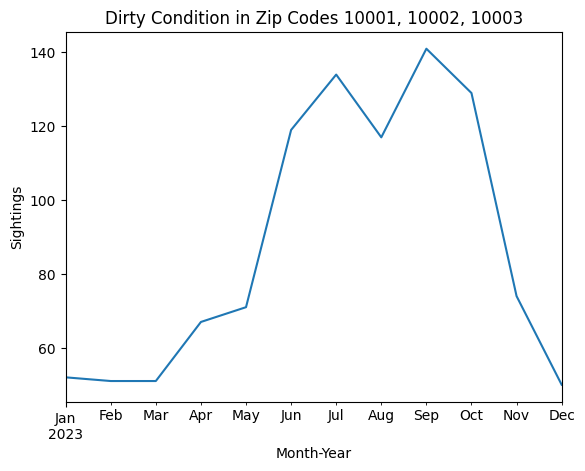

In [56]:
# Step 1: Ensure 'Created Date' is a datetime column
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Step 2: Create 'month_year' column
df['month_year'] = df['Created Date'].dt.to_period('M')

# Step 3: Filter for specified zip codes and group by 'month_year' show the last 12 months
zip_filtered_counts = df[df['Incident Zip'].isin([10001, 10002, 10003])].groupby('month_year').size().tail(36)

# Step 4: Plot the result
zip_filtered_counts.plot(title='Dirty Condition in Zip Codes 10001, 10002, 10003', xlabel='Month-Year', ylabel='Sightings')

### Plot all incidents on a map

/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_75426/238455323.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Created Date'] = pd.to_datetime(df['Created Date'], infer_datetime_format=True, errors='coerce')
/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_75426/238455323.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], infer_datetime_format=True, errors='coerce')


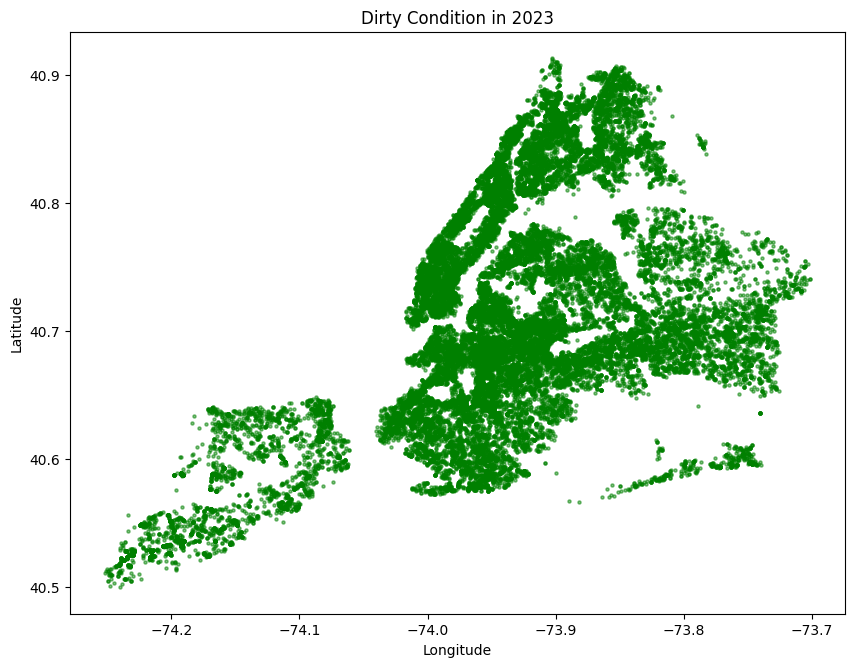

In [58]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = './data/dirty-condition_2023.csv'  # Ensure the file is in the correct path
df = pd.read_csv(csv_path, low_memory=False)

# Ensure the 'Created Date' column is in datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], infer_datetime_format=True, errors='coerce')

# Extract year from 'Created Date' and create a new 'year' column
df['year'] = df['Created Date'].dt.year

# Filter for Dirty Condition from 2023
df_2023 = df[df['year'].isin([2023])].copy()

# Define the column names for latitude and longitude
latitude_col = 'Latitude'
longitude_col = 'Longitude'

# Check if 'geometry' column exists, if not create it
if 'geometry' not in df_2023.columns:
    # Ensure 'Latitude' and 'Longitude' columns exist
    if latitude_col in df_2023.columns and longitude_col in df_2023.columns:
        # Create 'geometry' column from 'Latitude' and 'Longitude'
        df_2023['geometry'] = [Point(xy) for xy in zip(df_2023[longitude_col], df_2023[latitude_col])]
        gdf_2023 = gpd.GeoDataFrame(df_2023, geometry='geometry')
        # Save the GeoDataFrame as a GeoJSON file
        geojson_path = './dirty-conditions-2023.geojson'  # Ensure this path is correct and writable
        gdf_2023.to_file(geojson_path, driver='GeoJSON')
    else:
        print("Latitude and longitude columns are missing.")
else:
    gdf_2023 = gpd.GeoDataFrame(df_2023, geometry='geometry')
    # Save the GeoDataFrame as a GeoJSON file
    geojson_path = './dirty-conditions-2023.geojson'  # Ensure this path is correct and writable
    gdf_2023.to_file(geojson_path, driver='GeoJSON')

# print(f'GeoJSON file saved to: {geojson_path}')

# Plot the data on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
base = gdf_2023.plot(ax=ax, color='green', markersize=5, alpha=0.5)
plt.title('Dirty Condition in 2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
